## Organisation :
Dans ce second notebook, on souhaite comprendre et interpréter les données des études extraites dans le notebook précédent, notamment en générant des visualisations.

- On importe les données extraites dans le notebook précédent
- On vérifie la cohérence des données
- Génération des visualisations et repérage des données problématiques:
   
    + Champ 'HasResults'
    + Publications par type et par année
    + Délai entre la publication et la fin de l'étude
    + Délai entre la publication et le début de l'étude
    + Passages des données problématiques en type 'SUSPICIOUS'
    + Durée des études cliniques
    + Statut Open Access des publications

- Statistiques
- Export pour un traitement manuel

Installer `Seaborn`, si il n'est pas déjà présent:

`python -m pip install seaborn`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Import de la DataFrame :

In [2]:
df_extract = pd.read_csv('Data/outputs/df_extract.csv', sep=';', encoding='utf-8-sig')
# df_extract.info()

In [3]:
df_extract = df_extract.astype(
    {
        # ClinicalTrial
        'OverallStatus': 'category',
        'StudyType': 'category',
        'type': 'category',

        'StudyFirstPostDate': 'datetime64[ns]',
        'StartDate': 'datetime64[ns]',
        'CompletionDate': 'datetime64[ns]',

        # Unpaywall
        'is_paratext': 'boolean',
        'published_date': 'datetime64[ns]',
        'is_oa': 'boolean',
        'oa_status': 'category',
        'has_repository_copy': 'boolean',

        # OpenAlex
        'type_openalex': 'category',
        'primary_topic': 'category',
        'subfield': 'category',
        'field': 'category',
        'domain': 'category',
    }
)  # fmt: skip
df_extract = df_extract.convert_dtypes()
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NCTId                468 non-null    string        
 1   BriefTitle           468 non-null    string        
 2   LeadSponsorName      468 non-null    string        
 3   CollaboratorName     220 non-null    string        
 4   OverallStatus        468 non-null    category      
 5   StudyType            468 non-null    category      
 6   HasResults           468 non-null    boolean       
 7   StudyFirstPostDate   468 non-null    datetime64[ns]
 8   StartDate            468 non-null    datetime64[ns]
 9   CompletionDate       468 non-null    datetime64[ns]
 10  pmid                 369 non-null    Int64         
 11  type                 369 non-null    category      
 12  title                369 non-null    string        
 13  authors              369 non-null  

In [4]:
df_extract

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,...,is_paratext,published_date,is_oa,oa_status,has_repository_copy,type_openalex,primary_topic,subfield,field,domain
0,NCT02099474,Evaluation of Raltegravir During the Third Tri...,"ANRS, Emerging Infectious Diseases",<NA>,COMPLETED,INTERVENTIONAL,False,2014-03-31,2014-06-30,2017-04-01,...,False,2020-09-21,True,green,True,article,Efficacy and Safety of Antiretroviral Therapy ...,Infectious Diseases,Medicine,Health Sciences
1,NCT02497274,Obesity and Lipids: a Matter of Taste?,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2015-07-14,2016-01-11,2019-01-01,...,<NA>,NaT,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
2,NCT02592174,"Prevalence, Characteristics and Risk Factors o...","ANRS, Emerging Infectious Diseases",Merck Sharp & Dohme LLC,COMPLETED,INTERVENTIONAL,False,2015-10-30,2016-01-26,2017-10-27,...,False,2019-07-25,True,hybrid,False,article,Human Immunodeficiency Virus/Acquired Immunode...,Virology,Immunology and Microbiology,Life Sciences
3,NCT01490489,EG-VEGF : Potential Marker of Pre-eclampsia an...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-12-13,2011-07-11,2015-03-13,...,False,2008-10-16,True,green,True,preprint,Pathophysiology and Management of Preeclampsia,Obstetrics and Gynecology,Medicine,Health Sciences
4,NCT01490489,EG-VEGF : Potential Marker of Pre-eclampsia an...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-12-13,2011-07-11,2015-03-13,...,False,2007-10-01,False,closed,False,article,Neuroendocrine Regulation of Appetite and Body...,Endocrine and Autonomic Systems,Neuroscience,Life Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2009-12-23,2009-05-07,2017-12-14,...,False,2013-07-01,False,closed,False,article,Molecular Mechanisms of Neurodegenerative Dise...,Cellular and Molecular Neuroscience,Neuroscience,Life Sciences
464,NCT02833961,Diffusion Spectroscopy in Stroke,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2016-07-14,2016-07-28,2019-10-25,...,False,2023-03-01,True,green,True,article,Diffusion Magnetic Resonance Imaging,"Radiology, Nuclear Medicine and Imaging",Medicine,Health Sciences
465,NCT02976298,Effects of Cerebellum or Supplementary Motor A...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2016-11-29,2013-02-01,2015-01-01,...,<NA>,NaT,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
466,NCT01842477,Evaluation of Efficacy and Safety of Autologou...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2013-04-29,2013-05-01,2016-02-05,...,<NA>,NaT,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN


## Vérification des données

### Nombre d'études :

In [5]:
df_extract.loc[:, 'NCTId'].nunique()

190

### Nombre de publications :

#### PMIDs :

Nombre de pmids total:

In [6]:
df_extract.loc[:, 'pmid'].count()

369

Nombre de pmids uniques:

In [7]:
df_extract.loc[:, 'pmid'].nunique()

363

Etudes qui partagent une publication :

In [8]:
df_extract.loc[
    df_extract['pmid'].notna() & df_extract['pmid'].duplicated(keep=False),
    ['NCTId', 'BriefTitle', 'pmid', 'type', 'title', 'doi'],
].sort_values(by='pmid')

,NCTId,BriefTitle,pmid,type,title,doi
51,NCT00136630,"Natural History, Genetic Bases and Phenotype-g...",24780882,DERIVED,Prediction of the age at onset in spinocerebel...,10.1136/jmedgenet-2013-102200
461,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,24780882,DERIVED,Prediction of the age at onset in spinocerebel...,10.1136/jmedgenet-2013-102200
131,NCT01882062,Proof of Concept of an Anaplerotic Study Using...,25568297,RESULT,Triheptanoin improves brain energy metabolism ...,10.1212/WNL.0000000000001214
226,NCT01696708,Utilization of 31P-Nuclear Magnetic Resonance ...,25568297,DERIVED,Triheptanoin improves brain energy metabolism ...,10.1212/WNL.0000000000001214
92,NCT00640263,Comparison of Efficacy and Safety of Infant Pe...,26603917,DERIVED,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
233,NCT03870438,Prevention of Mother-to-child Transmission of ...,26603917,BACKGROUND,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
240,NCT03519503,Infant Peri-Exposure Prophylaxis to Prevent HI...,26603917,BACKGROUND,Extended pre-exposure prophylaxis with lopinav...,10.1016/S0140-6736(15)00984-8
66,NCT02573948,Feasibility of Interventions on People Who Inj...,27178119,RESULT,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698
122,NCT04008927,A Community-based Intervention Among Active Dr...,27178119,BACKGROUND,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698
334,NCT03537196,DRug Use & Infections in ViEtnam - Hepatitis C...,27178119,BACKGROUND,Integrated respondent-driven sampling and peer...,10.1080/09540121.2016.1178698


In [9]:
num_duplicate_pmid = len(
    df_extract.loc[df_extract['pmid'].notna() & df_extract['pmid'].duplicated(), 'pmid']
)

assert (
    df_extract.loc[:, 'pmid'].count()
    == df_extract.loc[:, 'pmid'].nunique() + num_duplicate_pmid
)

#### DOIs :

Nombre de DOI total:

In [10]:
df_extract.loc[:, 'doi'].count()

368

Nombre de DOI uniques:

In [11]:
df_extract.loc[:, 'doi'].nunique()

362

Etude avec un PMID mais sans DOI :

In [12]:
df_extract.loc[
    df_extract.loc[:, 'pmid'].notna() & df_extract.loc[:, 'doi'].isna(),
    ['NCTId', 'BriefTitle', 'pmid', 'type', 'title', 'doi'],
]

,NCTId,BriefTitle,pmid,type,title,doi
343,NCT03537196,DRug Use & Infections in ViEtnam - Hepatitis C...,19839502,BACKGROUND,High prevalence of Hepatitis C virus genotype ...,<NA>


In [13]:
num_duplicate_doi = len(
    df_extract.loc[df_extract['doi'].notna() & df_extract['doi'].duplicated(), ['doi']]
)

assert (
    df_extract.loc[:, 'doi'].count()
    == df_extract.loc[:, 'doi'].nunique() + num_duplicate_doi
)

### Vérification des sponsors:

In [14]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'LeadSponsorName'].value_counts()

LeadSponsorName
Institut National de la Santé Et de la Recherche Médicale, France    107
ANRS, Emerging Infectious Diseases                                    72
French National Agency for Research on AIDS and Viral Hepatitis        8
Paris Cardiovascular Research Center (Inserm U970)                     2
Programme PAC-CI, Site ANRS-MIE de Côte d'Ivoire                       1
Name: count, dtype: Int64

### Vérification des dates :

#### StudyFirstPostDate :

In [15]:
(
    df_extract.drop_duplicates(subset='NCTId')
    .loc[:, 'StudyFirstPostDate']
    .notna()
    .value_counts()
)

StudyFirstPostDate
True    190
Name: count, dtype: int64

#### StartDate :

In [16]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'StartDate'].notna().value_counts()

StartDate
True    190
Name: count, dtype: int64

#### CompletionDate :

In [17]:
(
    df_extract.drop_duplicates(subset='NCTId')
    .loc[:, 'CompletionDate']
    .notna()
    .value_counts()
)

CompletionDate
True    190
Name: count, dtype: int64

#### Nombre d'études dont la date de fin est après 2013 :

In [18]:
(
    df_extract.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].dt.year >= 2013
).value_counts()

CompletionDate
True    190
Name: count, dtype: int64

#### published_date :

Si le DOI est \<NA>, alors 'published_date' est \<NA> car on interroge Unpaywall via le DOI :

In [19]:
df_extract.loc[:, 'published_date'].notna().value_counts()

published_date
True     368
False    100
Name: count, dtype: int64

## Champ 'HasResults':

Etudes dont le champ 'HasResults' est True:

In [20]:
df_extract.loc[df_extract.loc[:, 'HasResults'], 'NCTId'].unique()

<StringArray>
['NCT02453048', 'NCT02573948', 'NCT01882062', 'NCT02212379', 'NCT01605890',
 'NCT00928187']
Length: 6, dtype: string

In [21]:
df_extract.loc[df_extract.loc[:, 'HasResults'], ['NCTId', 'HasResults', 'type']]

,NCTId,HasResults,type
31,NCT02453048,True,BACKGROUND
32,NCT02453048,True,BACKGROUND
33,NCT02453048,True,BACKGROUND
34,NCT02453048,True,BACKGROUND
35,NCT02453048,True,BACKGROUND
36,NCT02453048,True,DERIVED
37,NCT02453048,True,BACKGROUND
38,NCT02453048,True,BACKGROUND
39,NCT02453048,True,BACKGROUND
40,NCT02453048,True,BACKGROUND


In [22]:
nb_studies = len(df_extract.loc[:, 'NCTId'].unique())
nb_studies_has_result = len(
    df_extract.loc[df_extract.loc[:, 'HasResults'], 'NCTId'].unique()
)
print("Nombre d'etudes dont le champ 'HasResults' est True:")
print(f'{nb_studies_has_result}/{nb_studies}')

Nombre d'etudes dont le champ 'HasResults' est True:
6/190


**Le nombre très faible d'études qui renseignent le champ 'HasResults', fait que l'on peut difficilement exploiter cette donnée**.

Mais quand le champs est renseigné, on a affaire à des études de qualité, où l'on peut généralement se fier aux types de publication indiqué.

## Publications par type et par année:

Nombre de publications par année:

In [23]:
df_year_type = df_extract.loc[:, ['published_date', 'type']].dropna()
df_year_type['year'] = df_year_type['published_date'].dt.year.astype(int)
df_year_type = df_year_type.drop(columns='published_date')
df_year_type

,type,year
0,DERIVED,2020
2,DERIVED,2019
3,RESULT,2008
4,RESULT,2007
5,RESULT,2006
...,...,...
460,DERIVED,2022
461,DERIVED,2014
462,DERIVED,2020
463,DERIVED,2013


In [24]:
publications_per_year_pivot_table = pd.pivot_table(
    df_year_type,
    index='year',
    columns='type',
    aggfunc='size',
    fill_value=0,
    observed=False,
)
publications_per_year_pivot_table

type,BACKGROUND,DERIVED,PUBMED,RESULT
year,,,,
1980,0,0,0,1
1990,0,0,0,1
1991,1,0,0,0
1994,1,0,0,0
1999,1,0,0,0
2000,1,0,0,0
2002,1,0,0,0
2003,0,0,0,1
2004,0,0,0,4


In [25]:
min_year = df_year_type.loc[:, 'year'].min()
max_year = df_year_type.loc[:, 'year'].max()
print(f'{min_year=}, {max_year=}')

min_year=1980, max_year=2024


In [26]:
palette = {'BACKGROUND': 'C0', 'DERIVED': 'C1', 'PUBMED': 'C3', 'RESULT': 'C2'}

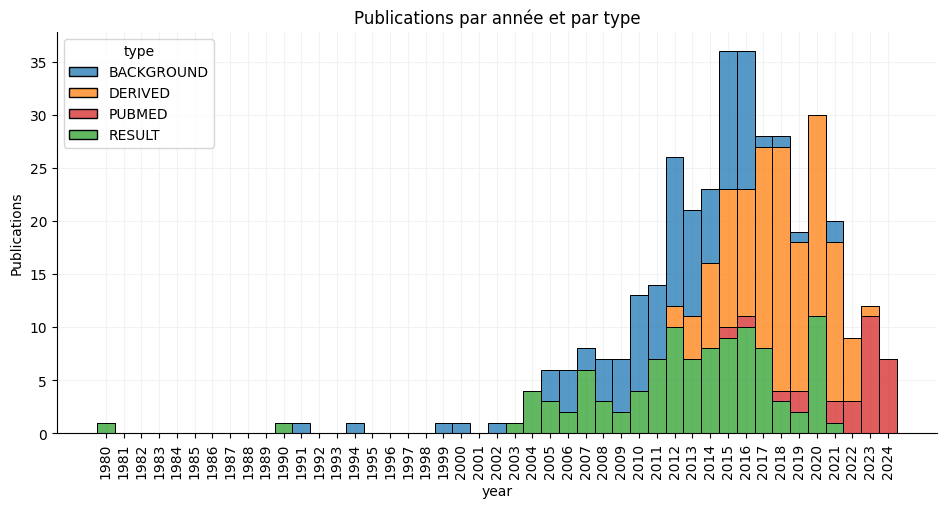

In [27]:
g = sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# x axis ticks
g.set_xticks(range(min_year, max_year + 1))
g.tick_params(axis='x', labelrotation=90)

# Grid
g.grid(color='0.95')
g.set_axisbelow(True)

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(title='Publications par année et par type', ylabel='Publications')

# Remove spines
sns.despine()

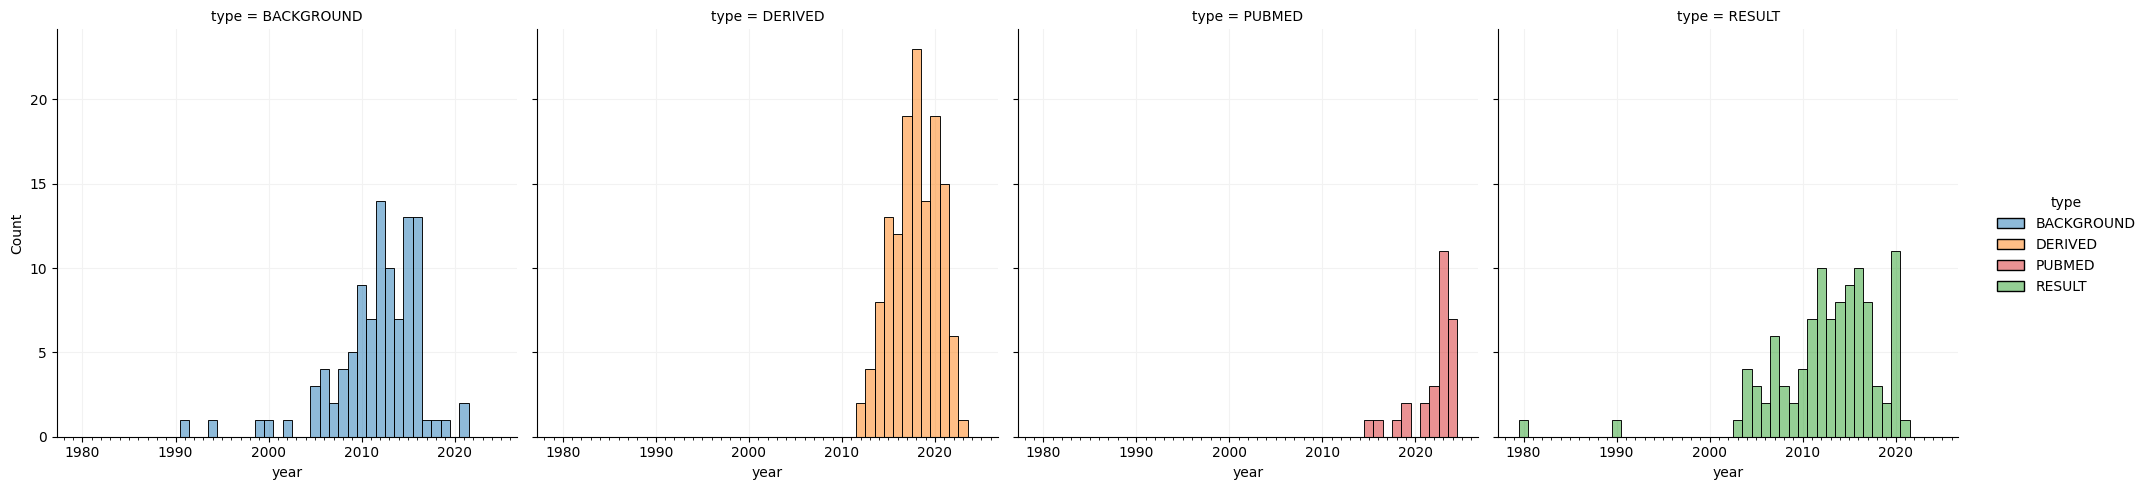

In [28]:
from matplotlib.ticker import AutoMinorLocator

g = sns.displot(
    data=df_year_type,
    x='year',
    hue='type',
    kind='hist',
    col='type',
    discrete=True,
    palette=palette,
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

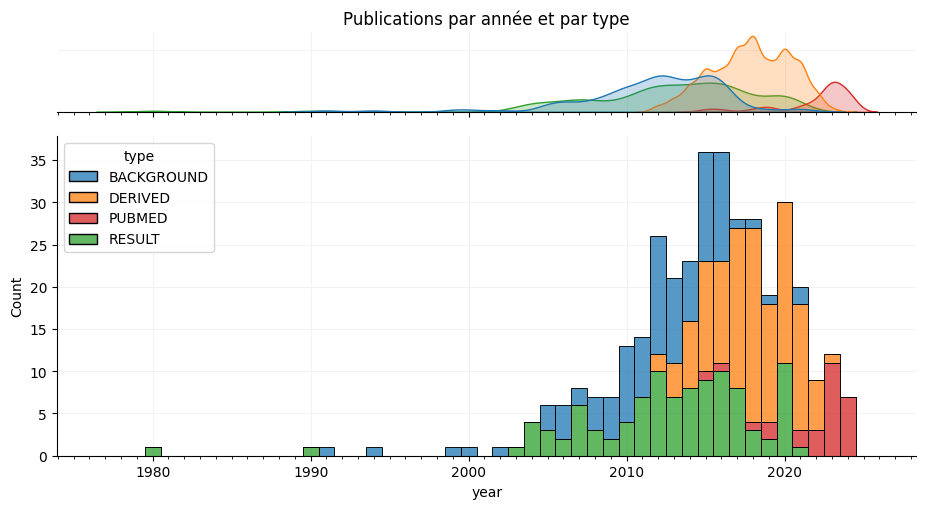

In [29]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=df_year_type,
    x='year',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title='Publications par année et par type', ylabel='')

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Interprétation :

On remarque deux valeurs extrêmes qui sont classées comme **'RESULT'** :

In [30]:
mask = df_extract.loc[:, 'published_date'].dt.year <= 1990
columns_to_display = [
    'NCTId',
    'BriefTitle',
    'CompletionDate',
    'pmid',
    'type',
    'title',
    'doi',
    'published_date',
]

df_extract.loc[mask, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
100,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980-03-01
161,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990-11-01


Pour chacune de ces études, toutes leurs publications sont classées comme **'RESULT'**:

In [31]:
nctids = df_extract.loc[mask, 'NCTId']

In [32]:
mask_0 = df_extract.loc[:, 'NCTId'] == nctids.iloc[0]

df_extract.loc[mask_0, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
100,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980-03-01
101,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,22639796,RESULT,Linking visual response properties in the supe...,10.1111/j.1460-9568.2012.08079.x,2012-05-28
102,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,23916713,RESULT,Enhanced visual responses in the superior coll...,10.1016/j.neuroscience.2013.07.047,2013-11-01


In [33]:
mask_1 = df_extract.loc[:, 'NCTId'] == nctids.iloc[1]

df_extract.loc[mask_1, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,published_date
159,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,12914551,RESULT,Pharmacokinetic-pharmacodynamic study of apomo...,10.1046/j.1472-8206.2003.00152.x,2003-07-07
160,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15777732,RESULT,"Lamotrigine, carbamazepine and phenytoin diffe...",10.1016/j.eplepsyres.2005.02.002,2005-02-01
161,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990-11-01
162,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15249613,RESULT,PET evidence for a role of the basal ganglia i...,10.1212/01.wnl.0000132840.40838.13,2004-07-13
163,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15037514,RESULT,Effect of acute and chronic lamotrigine on bas...,10.1038/sj.bjp.0705737,2004-05-01


**Certaine etudes cliniques classent toutes les publications associées comme 'RESULT', on ne peut donc pas se fier a cette valeur**

Les etudes dont toutes les publications sont de type 'RESULT' :

In [34]:
nctids = df_extract.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_extract.loc[:, 'NCTId'] == nctid
    if (df_extract.loc[mask, 'type'] == 'RESULT').all():
        res.append(nctid)
print(res)
print(f'{len(res)=}')

['NCT01490489', 'NCT04470648', 'NCT02488395', 'NCT01882062', 'NCT01432821', 'NCT03235258', 'NCT02916732']
len(res)=7


In [35]:
df_extract.loc[df_extract.loc[:, 'NCTId'].isin(res), ['NCTId', 'type']].head(10)

,NCTId,type
3,NCT01490489,RESULT
4,NCT01490489,RESULT
5,NCT01490489,RESULT
73,NCT04470648,RESULT
74,NCT04470648,RESULT
75,NCT04470648,RESULT
76,NCT04470648,RESULT
77,NCT04470648,RESULT
78,NCT04470648,RESULT
79,NCT04470648,RESULT


## Délai entre la publication et la fin de l'étude :

In [36]:
df_completion_date = (
    df_extract.loc[:, ['NCTId', 'type', 'CompletionDate', 'published_date']].dropna()
)  # fmt: skip
df_completion_date

,NCTId,type,CompletionDate,published_date
0,NCT02099474,DERIVED,2017-04-01,2020-09-21
2,NCT02592174,DERIVED,2017-10-27,2019-07-25
3,NCT01490489,RESULT,2015-03-13,2008-10-16
4,NCT01490489,RESULT,2015-03-13,2007-10-01
5,NCT01490489,RESULT,2015-03-13,2006-04-01
...,...,...,...,...
460,NCT01037777,DERIVED,2017-12-14,2022-05-17
461,NCT01037777,DERIVED,2017-12-14,2014-04-29
462,NCT01037777,DERIVED,2017-12-14,2020-09-01
463,NCT01037777,DERIVED,2017-12-14,2013-07-01


In [37]:
# Example: If we have 190 days between 'published_date' and 'CompletionDate'
# When we rounds up to years, we obtains 0.52 years,
# If we use the round() function, we will obtain 1 year, when in fact less than a year passed
# The floor() function seems more appropriate

# Example: If we have -77 days between 'published_date' and 'CompletionDate'
# When we rounds up to years, we obtains -0.21 years,
# If we use the floor() function, we will obtain -1 year, when in fact less than a year passed
# We need to use the fix() function from Numpy

# > Some spreadsheet programs calculate the “floor-towards-zero”, where floor(-2.5) == -2.
# > NumPy instead uses the definition of floor where floor(-2.5) == -3. The “floor-towards-zero” function is called fix in NumPy.

In [38]:
time_completion_publication = np.fix(
    (
        df_completion_date.loc[:, 'published_date']
        - df_completion_date.loc[:, 'CompletionDate']
    ).apply(lambda x: x.days / 365)
).astype(int)

time_completion_publication = (
    time_completion_publication.rename('TimeCompletionPublication')
)  # fmt: skip
time_completion_publication = df_completion_date.join(time_completion_publication)
time_completion_publication

,NCTId,type,CompletionDate,published_date,TimeCompletionPublication
0,NCT02099474,DERIVED,2017-04-01,2020-09-21,3
2,NCT02592174,DERIVED,2017-10-27,2019-07-25,1
3,NCT01490489,RESULT,2015-03-13,2008-10-16,-6
4,NCT01490489,RESULT,2015-03-13,2007-10-01,-7
5,NCT01490489,RESULT,2015-03-13,2006-04-01,-8
...,...,...,...,...,...
460,NCT01037777,DERIVED,2017-12-14,2022-05-17,4
461,NCT01037777,DERIVED,2017-12-14,2014-04-29,-3
462,NCT01037777,DERIVED,2017-12-14,2020-09-01,2
463,NCT01037777,DERIVED,2017-12-14,2013-07-01,-4


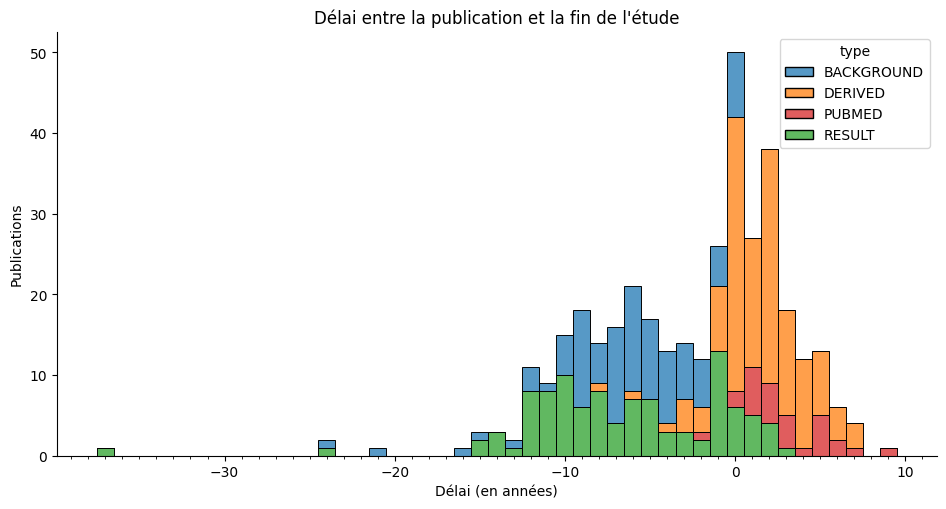

In [39]:
g = sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude",
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

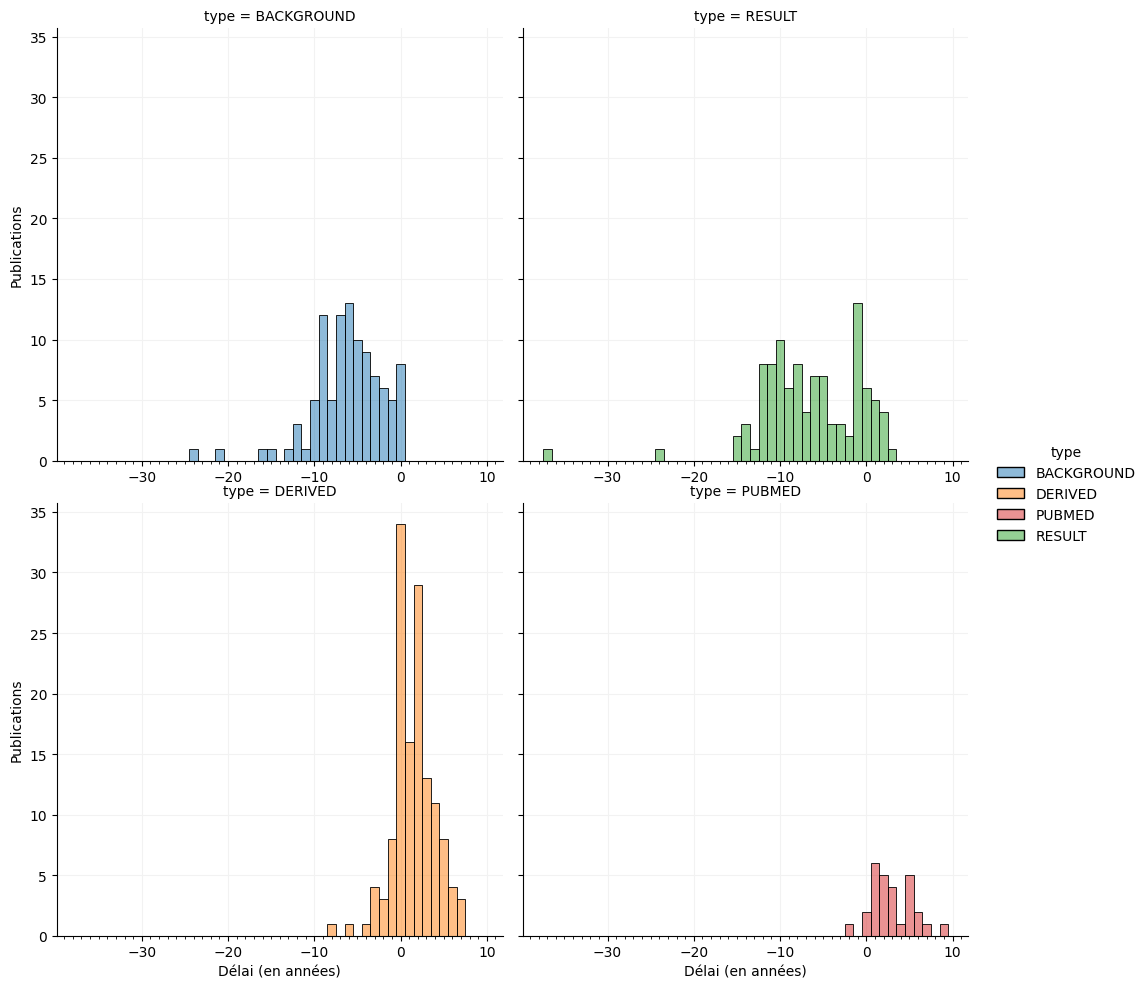

In [40]:
g = sns.displot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT', 'DERIVED', 'PUBMED'],
    col_wrap=2,
    discrete=True,
    kind='hist',
    palette=palette,
)

g.tick_params(labelbottom=True)
g.set_axis_labels('Délai (en années)', 'Publications')

for ax in g.axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

**Problablement des publications de type 'RESULT' parmis les 'DERIVED'**

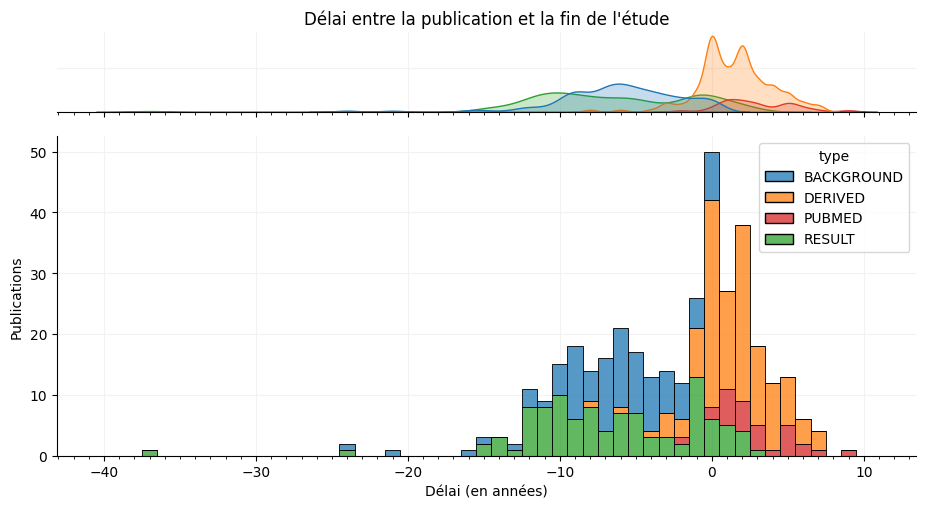

In [41]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et la fin de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

In [42]:
# for type in ['BACKGROUND', 'DERIVED', 'PUBMED', 'RESULT']:
#     mask_type = (time_completion_publication.loc[:, 'type'] == type)
#     df_type = time_completion_publication.loc[mask_type, 'TimeCompletionPublication']
#     df_type = df_type.reindex(time_completion_publication.index)

#     axs = df_type.plot.barh(
#         # x = time_completion_publication.index,
#         y = 'TimeCompletionPublication',
#         figsize = (5, 20),
#         color = palette[type],
#     )

# axs.invert_yaxis()
# axs.yaxis.set_visible(False)
# axs.set_frame_on(False)

# # Title
# axs.set(
#     xlabel='Délai (en années)'
# )

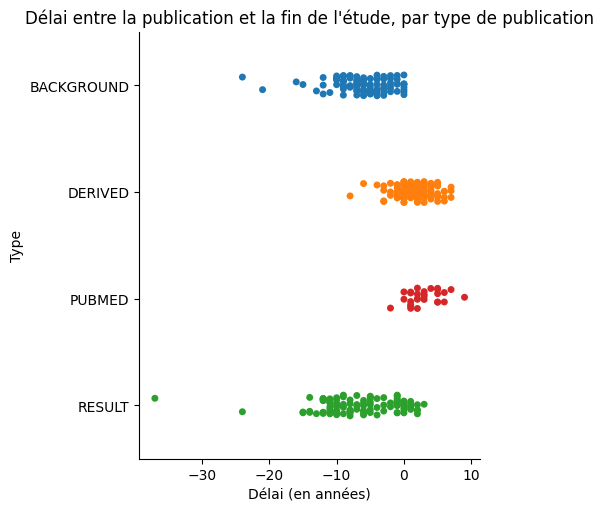

In [43]:
g = sns.catplot(
    data=time_completion_publication.dropna(),
    x='TimeCompletionPublication',
    y='type',
    hue='type',
    jitter=True,
    palette=palette,
)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude, par type de publication",
    xlabel='Délai (en années)',
    ylabel='Type',
)

## Délai entre la publication et le début de l'étude :

In [44]:
df_start_date = (
    df_extract.loc[:, ['NCTId', 'type', 'StartDate', 'published_date']].dropna()
)  # fmt: skip
df_start_date

,NCTId,type,StartDate,published_date
0,NCT02099474,DERIVED,2014-06-30,2020-09-21
2,NCT02592174,DERIVED,2016-01-26,2019-07-25
3,NCT01490489,RESULT,2011-07-11,2008-10-16
4,NCT01490489,RESULT,2011-07-11,2007-10-01
5,NCT01490489,RESULT,2011-07-11,2006-04-01
...,...,...,...,...
460,NCT01037777,DERIVED,2009-05-07,2022-05-17
461,NCT01037777,DERIVED,2009-05-07,2014-04-29
462,NCT01037777,DERIVED,2009-05-07,2020-09-01
463,NCT01037777,DERIVED,2009-05-07,2013-07-01


In [45]:
time_start_publication = np.fix(
    (
        df_start_date.loc[:, 'published_date']
        - df_start_date.loc[:, 'StartDate']
    ).apply(lambda x: x.days / 365)
).astype(int)  # fmt: skip

time_start_publication = time_start_publication.rename('TimeStartPublication')
time_start_publication = df_start_date.join(time_start_publication)
time_start_publication

,NCTId,type,StartDate,published_date,TimeStartPublication
0,NCT02099474,DERIVED,2014-06-30,2020-09-21,6
2,NCT02592174,DERIVED,2016-01-26,2019-07-25,3
3,NCT01490489,RESULT,2011-07-11,2008-10-16,-2
4,NCT01490489,RESULT,2011-07-11,2007-10-01,-3
5,NCT01490489,RESULT,2011-07-11,2006-04-01,-5
...,...,...,...,...,...
460,NCT01037777,DERIVED,2009-05-07,2022-05-17,13
461,NCT01037777,DERIVED,2009-05-07,2014-04-29,4
462,NCT01037777,DERIVED,2009-05-07,2020-09-01,11
463,NCT01037777,DERIVED,2009-05-07,2013-07-01,4


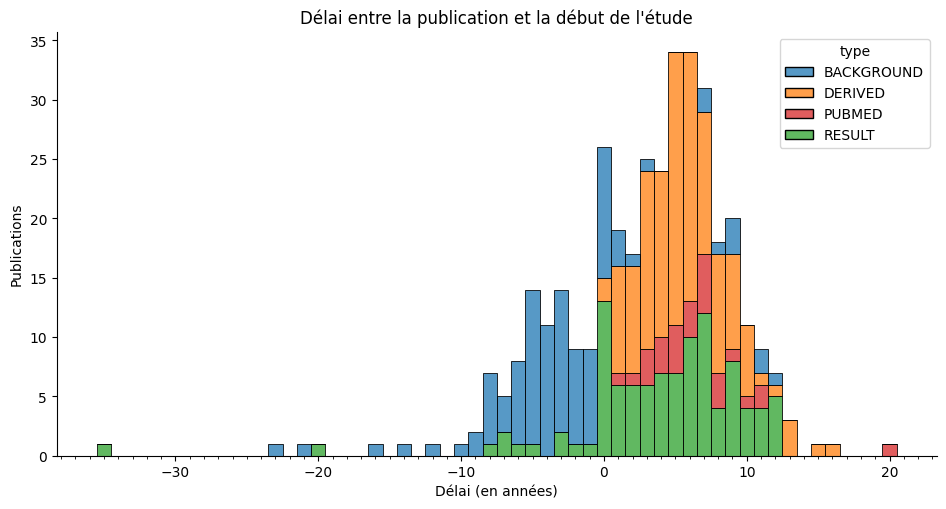

In [46]:
g = sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(
    title="Délai entre la publication et la début de l'étude",
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

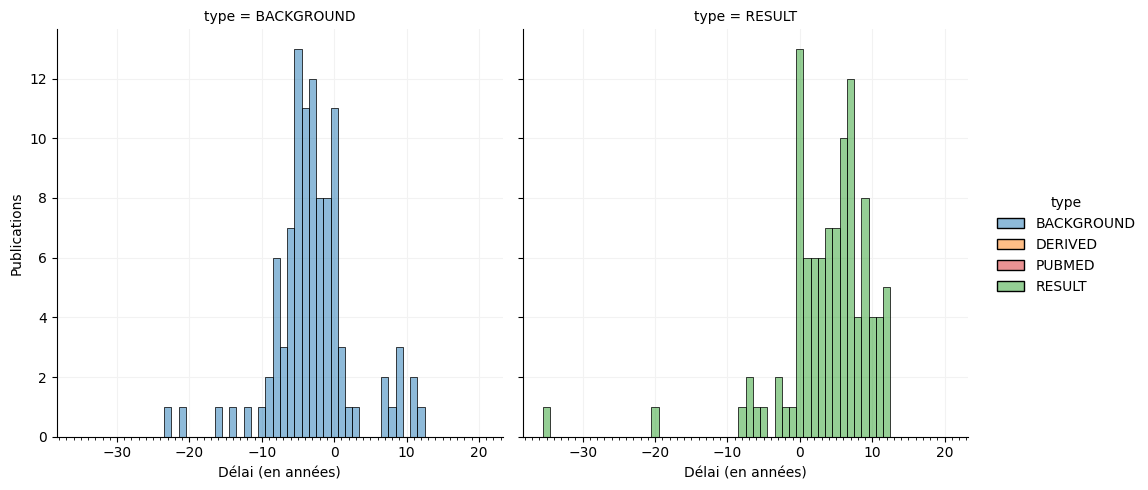

In [47]:
g = sns.displot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT'],
    discrete=True,
    kind='hist',
    palette=palette,
)
# g.set_ylabels('Publications')

# Title
g.set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

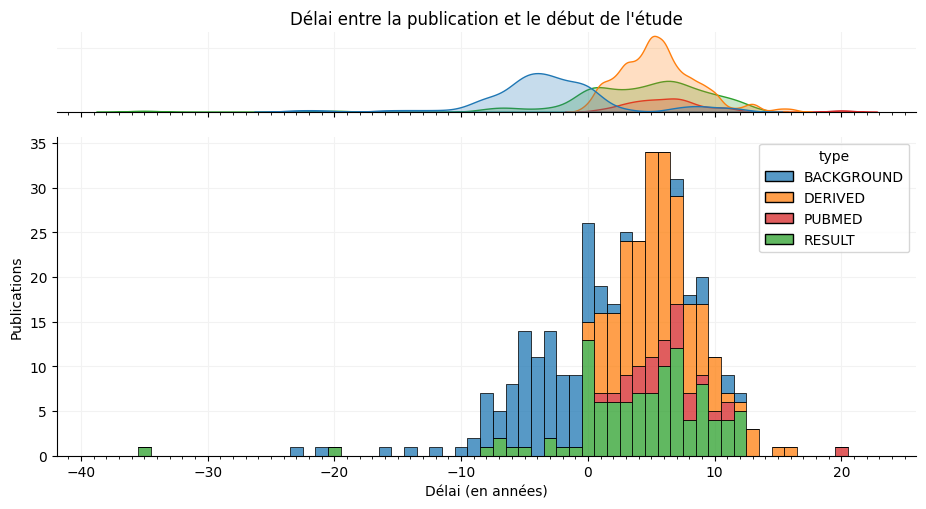

In [48]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et le début de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Interprétation :

**Les publications de type 'RESULT' avant la date de début de l'étude sont problématiques -> Les passer en type 'SUSPICIOUS' ?**

**Le cluster de publications de type 'BACKGROUND' 10 ans après le début des études est suspect.**  S'agit-il de 'RESULT' ?

Publications de type 'RESULT' dont la date de publication est antérieur à la date de début de l'essai clinique :

In [49]:
mask_result = df_extract.loc[:, 'type'] == 'RESULT'
mask_time_neg = df_extract.loc[:, 'published_date'] < df_extract.loc[:, 'StartDate']

df_extract.loc[
    mask_result & mask_time_neg,
    ['NCTId', 'pmid', 'type', 'StartDate', 'published_date'],
]

,NCTId,pmid,type,StartDate,published_date
3,NCT01490489,19602057,RESULT,2011-07-11,2008-10-16
4,NCT01490489,17531315,RESULT,2011-07-11,2007-10-01
5,NCT01490489,16384869,RESULT,2011-07-11,2006-04-01
52,NCT00136630,15365159,RESULT,2005-05-01,2004-09-14
58,NCT00136630,15313841,RESULT,2005-05-01,2004-08-01
73,NCT04470648,32046819,RESULT,2020-07-22,2020-02-06
74,NCT04470648,32070465,RESULT,2020-07-22,2020-02-13
75,NCT04470648,32338732,RESULT,2020-07-22,2020-06-02
76,NCT04470648,32371096,RESULT,2020-07-22,2020-06-01
77,NCT04470648,31978945,RESULT,2020-07-22,2020-02-20


On remarque que juste quelques d'études concentrent ces publications problématiques :

In [50]:
nctids = df_extract.loc[mask_result & mask_time_neg].loc[:, 'NCTId'].unique()
nctids

<StringArray>
['NCT01490489', 'NCT00136630', 'NCT04470648', 'NCT02488395', 'NCT01432821']
Length: 5, dtype: string

Ces etudes cliniques semblent classer toutes leurs publications comme 'RESULT' :

In [51]:
df_extract.loc[df_extract.loc[:, 'NCTId'].isin(nctids), ['NCTId', 'type']]

,NCTId,type
3,NCT01490489,RESULT
4,NCT01490489,RESULT
5,NCT01490489,RESULT
49,NCT00136630,RESULT
50,NCT00136630,RESULT
51,NCT00136630,DERIVED
52,NCT00136630,RESULT
53,NCT00136630,DERIVED
54,NCT00136630,RESULT
55,NCT00136630,RESULT


### Les publications de type 'RESULT' avant la date de début de l'étude sont problématique, on les passe en type 'SUSPICIOUS' :

In [52]:
df_extract.loc[
    mask_result & mask_time_neg,
    ['NCTId', 'pmid', 'type', 'StartDate', 'published_date'],
]

,NCTId,pmid,type,StartDate,published_date
3,NCT01490489,19602057,RESULT,2011-07-11,2008-10-16
4,NCT01490489,17531315,RESULT,2011-07-11,2007-10-01
5,NCT01490489,16384869,RESULT,2011-07-11,2006-04-01
52,NCT00136630,15365159,RESULT,2005-05-01,2004-09-14
58,NCT00136630,15313841,RESULT,2005-05-01,2004-08-01
73,NCT04470648,32046819,RESULT,2020-07-22,2020-02-06
74,NCT04470648,32070465,RESULT,2020-07-22,2020-02-13
75,NCT04470648,32338732,RESULT,2020-07-22,2020-06-02
76,NCT04470648,32371096,RESULT,2020-07-22,2020-06-01
77,NCT04470648,31978945,RESULT,2020-07-22,2020-02-20


On change le type en 'SUSPICIOUS':

In [53]:
# Copy previous df
df_corrected = df_extract.copy()

# Add new 'SUSPICIOUS' category
df_corrected['type'] = (
    df_corrected['type'].cat.add_categories('SUSPICIOUS').astype('category')
)

# Change type to 'SUSPICIOUS'
df_corrected.loc[mask_result & mask_time_neg, 'type'] = 'SUSPICIOUS'

On vérifie que les publications concernées ont bien le nouveau 'type': 

In [54]:
# Make sure df_corrected and time_start_publication have the same index for the join
df_corrected.loc[
    mask_result & mask_time_neg,
    ['NCTId', 'pmid', 'type', 'StartDate', 'published_date'],
].join(time_start_publication.loc[:, 'TimeStartPublication'])

,NCTId,pmid,type,StartDate,published_date,TimeStartPublication
3,NCT01490489,19602057,SUSPICIOUS,2011-07-11,2008-10-16,-2
4,NCT01490489,17531315,SUSPICIOUS,2011-07-11,2007-10-01,-3
5,NCT01490489,16384869,SUSPICIOUS,2011-07-11,2006-04-01,-5
52,NCT00136630,15365159,SUSPICIOUS,2005-05-01,2004-09-14,0
58,NCT00136630,15313841,SUSPICIOUS,2005-05-01,2004-08-01,0
73,NCT04470648,32046819,SUSPICIOUS,2020-07-22,2020-02-06,0
74,NCT04470648,32070465,SUSPICIOUS,2020-07-22,2020-02-13,0
75,NCT04470648,32338732,SUSPICIOUS,2020-07-22,2020-06-02,0
76,NCT04470648,32371096,SUSPICIOUS,2020-07-22,2020-06-01,0
77,NCT04470648,31978945,SUSPICIOUS,2020-07-22,2020-02-20,0


### Les publications de type 'BACKGROUND' après la date de fin de l'étude sont problématiques, on veut les passer en 'SUSPICIOUS' :

In [55]:
mask_background = df_extract.loc[:, 'type'] == 'BACKGROUND'
mask_time_pos = (
    df_extract.loc[:, 'published_date'] > df_extract.loc[:, 'CompletionDate']
)

df_extract.loc[
    mask_background & mask_time_pos,
    ['NCTId', 'pmid', 'type', 'CompletionDate', 'published_date'],
]

,NCTId,pmid,type,CompletionDate,published_date
440,NCT03137797,27509048,BACKGROUND,2016-06-01,2016-08-10


On change le type en 'SUSPICIOUS':

In [56]:
# change type to 'SUSPICIOUS'
df_corrected.loc[mask_background & mask_time_pos, 'type'] = 'SUSPICIOUS'

On vérifie que les publications concernées ont bien le nouveau 'type': 

In [57]:
# Make sure df_corrected and time_start_publication have the same index for the join
df_corrected.loc[
    mask_background & mask_time_pos,
    ['NCTId', 'pmid', 'type', 'StartDate', 'published_date'],
].join(time_completion_publication.loc[:, 'TimeCompletionPublication'])

,NCTId,pmid,type,StartDate,published_date,TimeCompletionPublication
440,NCT03137797,27509048,SUSPICIOUS,2004-02-01,2016-08-10,0


## Durée des études cliniques :

In [58]:
df_start_completion = (
    df_extract.drop_duplicates(subset='NCTId')
    .loc[:, ['NCTId', 'StartDate', 'CompletionDate']]
    .dropna()
)
df_start_completion

,NCTId,StartDate,CompletionDate
0,NCT02099474,2014-06-30,2017-04-01
1,NCT02497274,2016-01-11,2019-01-01
2,NCT02592174,2016-01-26,2017-10-27
3,NCT01490489,2011-07-11,2015-03-13
6,NCT01552044,2012-01-01,2013-02-01
...,...,...,...
460,NCT01037777,2009-05-07,2017-12-14
464,NCT02833961,2016-07-28,2019-10-25
465,NCT02976298,2013-02-01,2015-01-01
466,NCT01842477,2013-05-01,2016-02-05


In [59]:
time_study_duration = (
    df_start_completion.loc[:, 'CompletionDate']
    - df_start_completion.loc[:, 'StartDate']
)
time_study_duration = time_study_duration.rename('StudyDuration')
time_study_duration = df_start_completion.join(time_study_duration)
time_study_duration

,NCTId,StartDate,CompletionDate,StudyDuration
0,NCT02099474,2014-06-30,2017-04-01,1006 days
1,NCT02497274,2016-01-11,2019-01-01,1086 days
2,NCT02592174,2016-01-26,2017-10-27,640 days
3,NCT01490489,2011-07-11,2015-03-13,1341 days
6,NCT01552044,2012-01-01,2013-02-01,397 days
...,...,...,...,...
460,NCT01037777,2009-05-07,2017-12-14,3143 days
464,NCT02833961,2016-07-28,2019-10-25,1184 days
465,NCT02976298,2013-02-01,2015-01-01,699 days
466,NCT01842477,2013-05-01,2016-02-05,1010 days


In [60]:
time_study_duration.loc[:, 'StudyDuration'].describe()

count                             190
mean     1341 days 00:07:34.736842112
std      1181 days 09:37:10.532222960
min                  61 days 00:00:00
25%                 699 days 18:00:00
50%                1088 days 00:00:00
75%                1522 days 18:00:00
max                7762 days 00:00:00
Name: StudyDuration, dtype: object

In [61]:
# In years instead of days
time_study_duration['StudyDurationYear'] = (
    time_study_duration['StudyDuration'].apply(lambda x: x.days / 365)
)  # fmt: skip
time_study_duration['StudyDurationYear'].describe()

count    190.000000
mean       3.673987
std        3.236715
min        0.167123
25%        1.917123
50%        2.980822
75%        4.171918
max       21.265753
Name: StudyDurationYear, dtype: float64

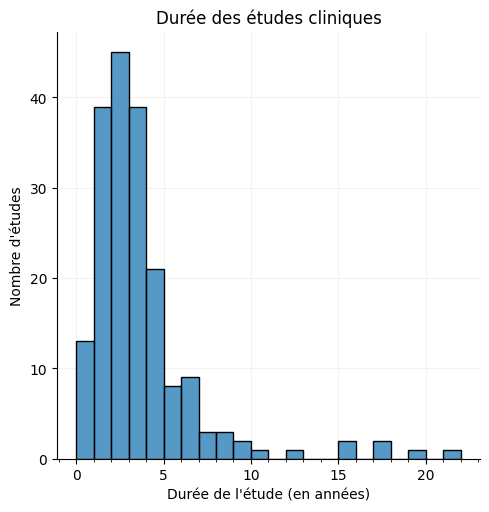

In [62]:
g = sns.displot(
    time_study_duration,
    x=time_study_duration['StudyDurationYear'],
    bins=range(
        0, np.ceil(time_study_duration['StudyDurationYear'].max()).astype('int') + 1
    ),
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

# Title
g.set(
    title='Durée des études cliniques',
    xlabel="Durée de l'étude (en années)",
    ylabel="Nombre d'études",
)

## Statut Open Access des publications :

In [63]:
mask_pmid_unique = ~(df_corrected.loc[:, 'pmid'].duplicated())

# Drop <NA> is_oa
df_oa_status = df_corrected.loc[
    mask_pmid_unique,
    [
        'pmid',
        'type',
        'is_oa',
        'oa_status',
        'primary_topic',
        'subfield',
        'field',
        'domain',
    ],
].dropna()
df_oa_status

,pmid,type,is_oa,oa_status,primary_topic,subfield,field,domain
0,32661003,DERIVED,True,green,Efficacy and Safety of Antiretroviral Therapy ...,Infectious Diseases,Medicine,Health Sciences
2,31755936,DERIVED,True,hybrid,Human Immunodeficiency Virus/Acquired Immunode...,Virology,Immunology and Microbiology,Life Sciences
3,19602057,SUSPICIOUS,True,green,Pathophysiology and Management of Preeclampsia,Obstetrics and Gynecology,Medicine,Health Sciences
4,17531315,SUSPICIOUS,False,closed,Neuroendocrine Regulation of Appetite and Body...,Endocrine and Autonomic Systems,Neuroscience,Life Sciences
5,16384869,SUSPICIOUS,False,closed,Pathophysiology and Management of Preeclampsia,Obstetrics and Gynecology,Medicine,Health Sciences
...,...,...,...,...,...,...,...,...
457,38273639,PUBMED,True,bronze,"Epidemiology, Classification, and Clinical Fea...",Epidemiology,Medicine,Health Sciences
460,35264424,DERIVED,True,green,Molecular Mechanisms of Neurodegenerative Dise...,Cellular and Molecular Neuroscience,Neuroscience,Life Sciences
462,32822634,DERIVED,True,green,Molecular Mechanisms of Neurodegenerative Dise...,Cellular and Molecular Neuroscience,Neuroscience,Life Sciences
463,23707147,DERIVED,False,closed,Molecular Mechanisms of Neurodegenerative Dise...,Cellular and Molecular Neuroscience,Neuroscience,Life Sciences


### Taux global:

In [64]:
df_oa_status['is_oa'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

is_oa
True     66.57%
False    33.43%
Name: proportion, dtype: object

### Taux par type:

#### Total :

In [65]:
sum = df_oa_status.groupby(by=['type', 'is_oa'], observed=True).size()
sum

type        is_oa
BACKGROUND  False     32
            True      64
DERIVED     False     28
            True     106
PUBMED      False     11
            True      17
RESULT      False     41
            True      41
SUSPICIOUS  False      9
            True      13
dtype: int64

#### Pourcentage :

In [66]:
(sum / sum.groupby(level=0, observed=True).sum() * 100).round(2).astype(str) + '%'

type        is_oa
BACKGROUND  False    33.33%
            True     66.67%
DERIVED     False     20.9%
            True      79.1%
PUBMED      False    39.29%
            True     60.71%
RESULT      False     50.0%
            True      50.0%
SUSPICIOUS  False    40.91%
            True     59.09%
dtype: object

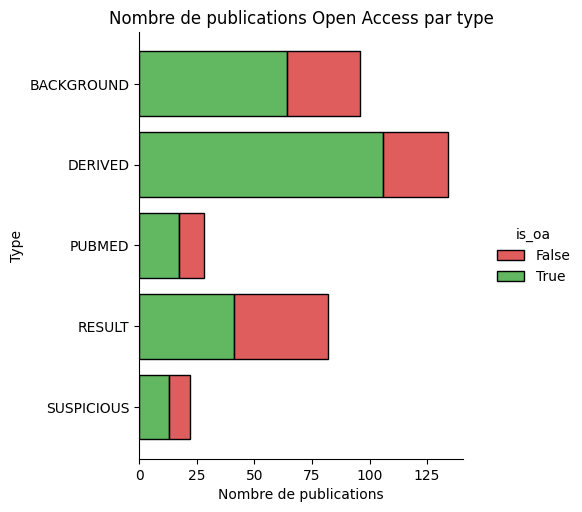

In [67]:
g = sns.displot(
    df_oa_status,
    y='type',
    hue='is_oa',
    discrete=True,
    multiple='stack',
    shrink=0.8,
    palette={False: 'C3', True: 'C2'},
    hue_order=[False, True],
)

# Title
g.set(
    title='Nombre de publications Open Access par type',
    xlabel='Nombre de publications',
    ylabel='Type',
)

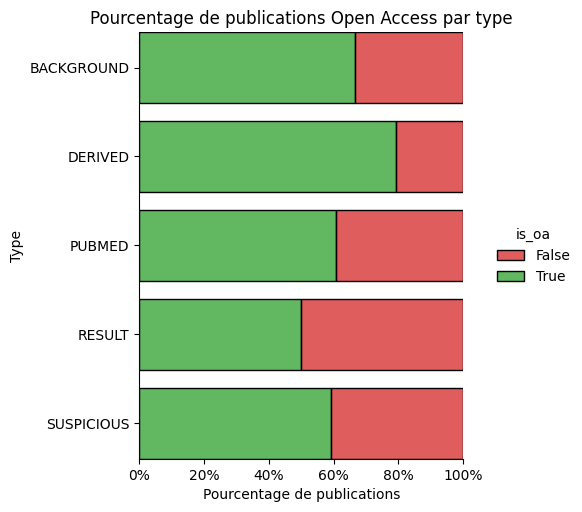

In [68]:
from matplotlib.ticker import PercentFormatter

g = sns.displot(
    df_oa_status,
    y='type',
    hue='is_oa',
    discrete=True,
    multiple='fill',
    stat='percent',
    shrink=0.8,
    palette={False: 'C3', True: 'C2'},
    hue_order=[False, True],
)

g.axes[0][0].xaxis.set_major_formatter(PercentFormatter(1))

# Title
g.set(
    title='Pourcentage de publications Open Access par type',
    xlabel='Pourcentage de publications',
    ylabel='Type',
)

### Status Open Access:

In [69]:
df_oa_status['oa_status'].value_counts()

oa_status
closed    121
bronze     86
gold       72
green      53
hybrid     30
Name: count, dtype: int64

In [70]:
(
    df_oa_status['oa_status'].value_counts(normalize=True).mul(100).round(2).astype(str)
    + '%'
)

oa_status
closed    33.43%
bronze    23.76%
gold      19.89%
green     14.64%
hybrid     8.29%
Name: proportion, dtype: object

### Domain :

In [71]:
df_oa_status['domain'].value_counts()

domain
Health Sciences      290
Life Sciences         56
Social Sciences       13
Physical Sciences      3
Name: count, dtype: int64

### Field :

In [72]:
df_oa_status['field'].value_counts()

field
Medicine                                        284
Immunology and Microbiology                      28
Neuroscience                                     25
Psychology                                        9
Health Professions                                5
Biochemistry, Genetics and Molecular Biology      3
Mathematics                                       3
Economics, Econometrics and Finance               2
Arts and Humanities                               1
Nursing                                           1
Social Sciences                                   1
Name: count, dtype: int64

### Subfield :

In [73]:
df_oa_status['subfield'].value_counts()

subfield
Infectious Diseases                                     108
Hepatology                                               55
Epidemiology                                             37
Cellular and Molecular Neuroscience                      20
Virology                                                 15
Public Health, Environmental and Occupational Health     14
Microbiology                                             13
Ophthalmology                                            11
Neurology                                                10
Psychiatry and Mental health                             10
Emergency Medicine                                        6
Radiology, Nuclear Medicine and Imaging                   6
General Health Professions                                5
Physiology                                                5
Pharmacology                                              4
Pediatrics, Perinatology and Child Health                 4
Biochemistry                   

### Primary topic :

In [74]:
df_oa_status['primary_topic'].value_counts()

primary_topic
Hepatitis C Infection and Treatment                                53
Prevention and Treatment of HIV/AIDS Infection                     50
Efficacy and Safety of Antiretroviral Therapy for HIV              37
Human Immunodeficiency Virus/Acquired Immunodeficiency Syndrome    15
Molecular Mechanisms of Neurodegenerative Diseases                 14
                                                                   ..
Health Effects of Precarious Employment and Unemployment            1
Healthcare Policy Reforms and Inequalities in France                1
Hepatitis E Infection and Treatment                                 1
Impact of Homelessness on Health and Well-being                     1
Global Impact of Sex Work and Trafficking                           1
Name: count, Length: 88, dtype: int64

## Statistiques :

#### Nombre d'études cliniques:

In [75]:
num_trials = len(df_corrected.loc[:, 'NCTId'].unique())
num_trials

190

#### Nombre de publications :

In [76]:
num_publications = df_corrected.loc[:, 'pmid'].notna().sum()
num_publications

369

#### Nombre de publications par types :

In [77]:
df_corrected.loc[:, 'type'].value_counts()

type
DERIVED       136
BACKGROUND    101
RESULT         82
PUBMED         28
SUSPICIOUS     22
Name: count, dtype: int64

#### Nombre d'études sans publications :

In [78]:
num_trials_wo_pub = len(df_corrected.loc[df_corrected.loc[:, 'pmid'].isna(), 'NCTId'])
print("Nombre d'études sans publications:")
print(f'{num_trials_wo_pub} / {num_trials} ({num_trials_wo_pub / num_trials:.2%})')

Nombre d'études sans publications:
99 / 190 (52.11%)


#### Nombre d'études avec au moins une publication :

In [79]:
num_trials_with_pub = len(
    df_corrected.loc[df_corrected.loc[:, 'pmid'].notna(), 'NCTId'].unique()
)
print("Nombre d'études avec au moins une publication :")
print(f'{num_trials_with_pub} / {num_trials} ({num_trials_with_pub / num_trials:.2%})')

Nombre d'études avec au moins une publication :
91 / 190 (47.89%)


In [80]:
assert num_trials == (num_trials_wo_pub + num_trials_with_pub)

#### Nombre d'études avec au moins une publication de type 'RESULT' :

In [81]:
num_trials_with_res = len(
    df_corrected.loc[(df_corrected.loc[:, 'type'] == 'RESULT'), 'NCTId'].unique()
)

In [82]:
print("Nombre d'études avec au moins une publication de type 'RESULT' :")
print(f'{num_trials_with_res} / {num_trials} ({num_trials_with_res / num_trials:.2%})')

Nombre d'études avec au moins une publication de type 'RESULT' :
8 / 190 (4.21%)


**Un nombre très faible d'études déclarent des résultats de type 'RESULT'.**  
Parmis ces études, un nombre encore plus faible concentrent la majorité des publications déclarées comme 'RESULT'.

In [83]:
df_corrected.loc[(df_extract.loc[:, 'type'] == 'RESULT'), 'NCTId'].value_counts()

NCTId
NCT03324633    34
NCT01546181    19
NCT03235258    12
NCT00136630    11
NCT04470648     8
NCT01432821     5
NCT02573948     4
NCT01490489     3
NCT02488395     3
NCT02916732     2
NCT01882062     1
NCT02329054     1
Name: count, dtype: Int64

#### Nombre d'études avec au moins une publication autre que 'BACKGROUND' :

In [84]:
# Unique NCTIDs with with publication type other than <NA>
nctids = df_corrected.loc[:, ['NCTId', 'type']].dropna().loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_corrected.loc[:, 'NCTId'] == nctid
    if ~((df_corrected.loc[mask, 'type'] == 'BACKGROUND').all()):
        res.append(nctid)

print("Nombre d'études avec au moins une publication autre que 'BACKGROUND' :")
print(f'{len(res)} / {num_trials} ({len(res) / num_trials:.2%})')

Nombre d'études avec au moins une publication autre que 'BACKGROUND' :
86 / 190 (45.26%)


Etudes dont toutes les publications sont de type 'BACKGROUND':

In [85]:
# Unique NCTIDs with with publication type other than <NA>
nctids = df_corrected.loc[:, ['NCTId', 'type']].dropna().loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_corrected.loc[:, 'NCTId'] == nctid
    if (df_corrected.loc[mask, 'type'] == 'BACKGROUND').all():
        res.append(nctid)
res

['NCT04780191', 'NCT02738502', 'NCT02496312', 'NCT03519503', 'NCT02656407']

## Sauvegarde de notre dataframe :

On sauvegarde notre dataframe avec les types modifiés:

In [86]:
df_corrected.to_csv(
    'Data/outputs/df_corrected.csv',
    sep=';',
    index=False,
    encoding='utf-8-sig',
)

## Export pour un traitement manuel :

On a constaté qu'on ne peut pas se fier aux données récupérées automatiquement, notamment le type de publications.  
Il va falloir faire une vérification manuelle.

In [87]:
columns_to_export = [
    'NCTId',
    'BriefTitle',
    'HasResults',
    'StartDate',
    'CompletionDate',
    'publication_types',
    # not useful because mostly 'article', if type different, already in 'publication_types'
    # 'type_openalex',
    'title',
    'published_date',
    'type',
    'doi',
    #'doi_link',
    'pmid',
    #'pmid_link',
]
df_to_export = df_corrected.loc[:, columns_to_export]

# Keep only year in dates
for date_column in ['StartDate', 'CompletionDate', 'published_date']:
    mask = df_to_export[date_column].notna()
    df_to_export[date_column] = df_to_export.loc[mask, date_column].dt.year
# Contains NaN value, so is casted to float64 by default, resulting in '2014.'
df_to_export['published_date'] = df_to_export['published_date'].astype('Int64')

df_to_export

,NCTId,BriefTitle,HasResults,StartDate,CompletionDate,publication_types,title,published_date,type,doi,pmid
0,NCT02099474,Evaluation of Raltegravir During the Third Tri...,False,2014,2017,"['Journal Article', 'Multicenter Study']",Effect of Pregnancy on Unbound Raltegravir Con...,2020,DERIVED,10.1128/AAC.00759-20,32661003
1,NCT02497274,Obesity and Lipids: a Matter of Taste?,False,2016,2019,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
2,NCT02592174,"Prevalence, Characteristics and Risk Factors o...",False,2016,2017,['Journal Article'],Increased Prevalence of Neurocognitive Impairm...,2019,DERIVED,10.1093/cid/ciz670,31755936
3,NCT01490489,EG-VEGF : Potential Marker of Pre-eclampsia an...,False,2011,2015,['Journal Article'],Role of EG-VEGF in human placentation: Physiol...,2008,SUSPICIOUS,10.1111/j.1582-4934.2008.00554.x,19602057
4,NCT01490489,EG-VEGF : Potential Marker of Pre-eclampsia an...,False,2011,2015,['Journal Article'],Placental expression of EG-VEGF and its recept...,2007,SUSPICIOUS,10.1016/j.placenta.2007.03.008,17531315
...,...,...,...,...,...,...,...,...,...,...,...
463,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,False,2009,2017,['Journal Article'],Biological and clinical characteristics of ind...,2013,DERIVED,10.1016/S1474-4422(13)70104-2,23707147
464,NCT02833961,Diffusion Spectroscopy in Stroke,False,2016,2019,['Journal Article'],Longitudinal Monitoring of Microstructural Alt...,2023,PUBMED,10.1148/radiol.220430,36318030
465,NCT02976298,Effects of Cerebellum or Supplementary Motor A...,False,2013,2015,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
466,NCT01842477,Evaluation of Efficacy and Safety of Autologou...,False,2013,2016,<NA>,<NA>,<NA>,NaN,<NA>,<NA>


#### Export en CSV :

In [88]:
df_to_export.to_csv(
    'Data/outputs/df_for_manual_treatment.csv',
    sep=';',
    index=False,
    encoding='utf-8-sig',
)

#### Export vers Excel:

Un exemple des mises en formes conditionnelles et formules qu'il est possible d'appliquer au fichier CSV pour rentre le traitement manuel plus pratique sous Excel, est inclus sous la forme du fichier "*df_for_manual_treatment.xlsx*"

On choisit de classer les publications dans les types suivant:
- Publications:
    + publication
    + résultat négatif
    + méta-analyse
- Non Publications:
    + background
    + protocole
    + autre (commentaire, lettre, erratum...)
